<table style="width:100%; border: 0px solid black;">
    <tr style="width: 100%; border: 0px solid black;">
        <td style="width:75%; border: 0px solid black;">
            <a href="http://www.drivendata.org">
                <img src="https://s3.amazonaws.com/drivendata-public-assets/logo-white-blue.png" />
            </a>
        </td>
    </tr>
</table>

# Data Science is Software
## Developer #lifehacks for the Jupyter Data Scientist

### Section 3:  Writing code for reusability

In [8]:
%matplotlib inline
from __future__ import print_function

import os

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

PROJ_ROOT = os.path.join(os.pardir, os.pardir)

## 3.1 No more docs-guessing

Don't edit-run-repeat to try to remember the name of a function or argument. Jupyter provides great docs integration and easy ways to remember the arguments to a function.

In [9]:
## Try adding parameter index=0
pump_data_path = os.path.join(PROJ_ROOT,
                              "data",
                              "raw",
                              "pumps_train_values.csv")

df = pd.read_csv(pump_data_path,index_col=0)
df.head(1)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [3]:
#pd.read_csv?

In [10]:
def load_pumps_data(values_path, labels_path):
    train = pd.read_csv(values_path, index_col='id', parse_dates=["date_recorded"])
    labels = pd.read_csv(labels_path, index_col='id')
    return train.join(labels)
    
    
values = os.path.join(PROJ_ROOT, "data", "raw", "pumps_train_values.csv")
labels = os.path.join(PROJ_ROOT, "data", "raw", "pumps_train_labels.csv")

df = load_pumps_data(values, labels)
assert df.shape == (59400, 40)

In [11]:
df.to_csv("../../data/interim/water_pumps.csv")

## 3.2 No more copy-pasta

Don't repeat yourself.

In [6]:
df.describe()

,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,2012-03-29 09:11:33.818181888,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
min,0.000000,2002-10-14 00:00:00,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2011-04-01 00:00:00,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,2012-10-10 00:00:00,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,2013-02-09 00:00:00,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2013-12-03 00:00:00,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000
std,2997.574558,NaN,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547


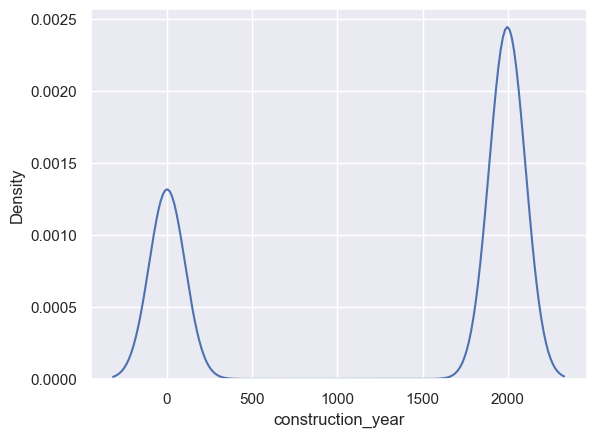

In [12]:
## Paste for 'construction_year' and plot
## Paste for 'gps_height' and plot
sns.set()
plot_data = df['construction_year']
sns.kdeplot(plot_data, bw_adjust=1)
plt.show()


In [13]:
def kde_plot(dataframe, variable, upper=None, lower=None, bw_adjust=0.1):
    """ Plots a density plot for a variable with optional upper and
        lower bounds on the data (inclusive).
    """
    plot_data = dataframe[variable]
    
    if upper is not None:
        plot_data = plot_data[plot_data <= upper]
    if lower is not None:
        plot_data = plot_data[plot_data >= lower]

    sns.kdeplot(plot_data, bw_adjust=bw_adjust)
    plt.show()

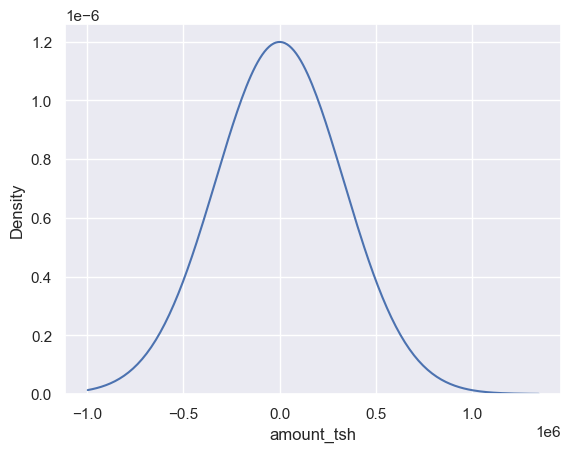

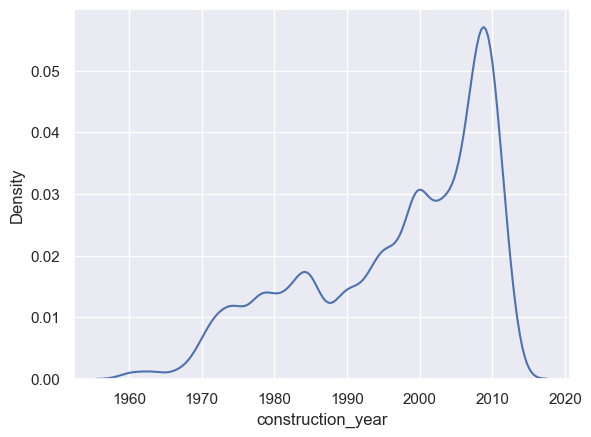

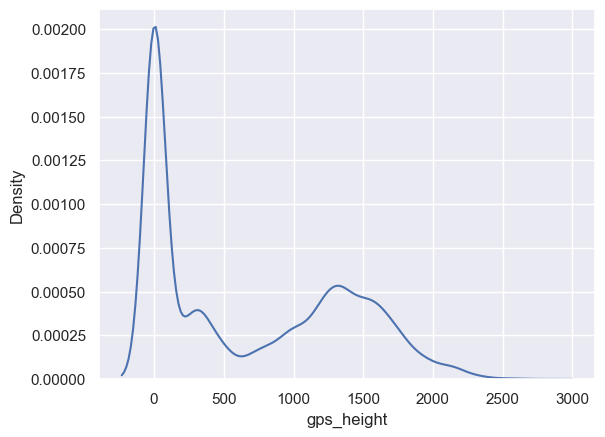

In [9]:
kde_plot(df, 'amount_tsh', bw_adjust=1000, lower=0)
kde_plot(df, 'construction_year', bw_adjust=1, lower=1000, upper=2016)
kde_plot(df, 'gps_height', bw_adjust=1,lower=0)

## 3.3 No more copy-paste between notebooks 

Have a method that gets used in multiple notebooks? Refactor it into a separate `.py` file so it can live a happy life!

Note: In order to import your local modules, you must do three things:

 - put the .py file in a separate folder
 - add an empty `__init__.py` file to the folder
 - add that folder to the Python path with `sys.path.append`

In [15]:
df = pd.read_csv("../../data/interim/water_pumps.csv", index_col=0)
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [11]:
# add local python functions
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, "src")
sys.path.append(src_dir)

# import my method from the source code
from features.build_features import remove_invalid_data

df = remove_invalid_data("../../data/interim/water_pumps.csv")
df.shape

(59400, 59)

In [12]:
df

,amount_tsh,gps_height,longitude,latitude,population,construction_year,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,...,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,109,1999.0,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
8776,NaN,1399,34.698766,-2.147466,280,2010.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
34310,25.0,686,37.460664,-3.821329,250,2009.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
67743,NaN,263,38.486161,-11.155298,58,1986.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
19728,NaN,0,31.130847,-1.825359,0,NaN,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,1210,37.169807,-3.253847,125,1999.0,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
27263,4700.0,1212,35.249991,-9.070629,56,1996.0,False,False,False,True,...,True,False,False,False,True,False,False,False,False,False
37057,NaN,0,34.017087,-8.750434,0,NaN,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [13]:
# TRY ADDING print("lalalala") to the method
df = remove_invalid_data("../../data/interim/water_pumps.csv")

Restart the kernel, let's try this again....

In [2]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.pardir, os.pardir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport features.build_features
from features.build_features import remove_invalid_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = remove_invalid_data("../../data/interim/water_pumps.csv")
df.head()

lalalalalala


,amount_tsh,gps_height,longitude,latitude,population,construction_year,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,...,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,109,1999.0,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
8776,NaN,1399,34.698766,-2.147466,280,2010.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
34310,25.0,686,37.460664,-3.821329,250,2009.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
67743,NaN,263,38.486161,-11.155298,58,1986.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
19728,NaN,0,31.130847,-1.825359,0,NaN,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


## 3.4 I'm too good! Now this code is useful to other projects!

Importing local code is great if you want to use it in multiple notebooks, but once you want to use the code in multiple projects or repositories, it gets complicated. This is when we get serious about isolation!

We can build a python package to solve that! In fact, there is a [cookiecutter to create Python packages](https://github.com/wdm0006/cookiecutter-pipproject).

Once we create this package, we can install it in "editable" mode, which means that as we change the code the changes will get picked up if the package is used. The process looks like

    cookiecutter https://github.com/wdm0006/cookiecutter-pipproject
    cd package_name
    pip install -e .
    
Now we can have a separate repository for this code and it can be used across projects without having to maintain code in multiple places.

## 3.5 Sometimes things go wrong

Interrupt execution with:
 - `%debug` magic: drops you out into _the most recent error stacktrace_ in pdb
 - `import q;q.d()`: drops you into pdb, even outside of IPython
 
Interrupt execution on an Exception with `%pdb` magic. Use [pdb](https://docs.python.org/2/library/pdb.html) the Python debugger to debug inside a notebook.  Key commands for `pdb` are:

 - `p`: Evaluate and print Python code
 
 
 - `w`: Where in the stack trace am I?
 - `u`: Go up a frame in the stack trace.
 - `d`: Go down a frame in the stack trace.
 
 
 - `c`: Continue execution
 - `q`: Stop execution

In [25]:
kde_plot(df,
         'date_recorded',
         upper=pd.to_datetime('2017-01-01'),
         lower=pd.to_datetime('1900-01-01'))

TypeError: '<=' not supported between instances of 'str' and 'Timestamp'

In [27]:
%debug

> c:\users\praka\desktop\springboard\homeworks\unit 24.1.2 water-pumps\notebooks\lectures\ops.pyx(107)pandas._libs.ops.scalar_compare()



ipdb>  q


Automatic pdb calling has been turned ON


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

> c:\users\praka\anaconda3\envs\water-pumps2\lib\site-packages\seaborn\_base.py(1084)_attach()
   1082                     f"{allowed_types} is required"
   1083                 )
-> 1084                 raise TypeError(err)
   1085 
   1086         # -- Get axis objects for each row in plot_data for type conversions and scaling



ipdb>  u


> c:\users\praka\anaconda3\envs\water-pumps2\lib\site-packages\seaborn\distributions.py(1679)kdeplot()
   1677         ax = plt.gca()
   1678 
-> 1679     p._attach(ax, allowed_types=["numeric", "datetime"], log_scale=log_scale)
   1680 
   1681     method = ax.fill_between if fill else ax.plot



ipdb>  q


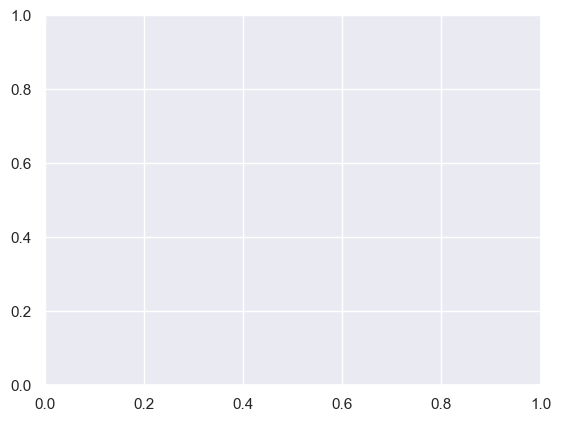

In [28]:
# "1" turns pdb on, "0" turns pdb off
%pdb 1

kde_plot(df, 'date_recorded')

In [29]:
# turn off debugger
%pdb 0

Automatic pdb calling has been turned OFF


**`#lifehack`: %debug and %pdb are great, but pdb can be clunky. Try the 'q' module. Adding the line `import q;q.d()` anywhere in a project gives you a normal python console at that point. This is great if you're running outside of IPython. **

## 3.6 Code profiling

Sometimes your code is slow. See which functions are called, how many times, and how long they take!

The `%prun` magic reports these to you right in the Jupyter notebook!

In [31]:
!pip install prettyplotlib

     ---------------------------------------- 0.0/697.1 kB ? eta -:--:--
     -------------------------------------- 697.1/697.1 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for prettyplotlib: filename=prettyplotlib-0.1.7-py3-none-any.whl size=16770 sha256=f950d6b97f5321d0d660be4a31858c3b64e29dcc60c56f97b86273c8b1af65a2
  Stored in directory: c:\users\praka\appdata\local\pip\cache\wheels\0d\91\fc\5b7319cd8820650d6ff47b9fbf9066e69547a265134a5da27d
Successfully built prettyplotlib


In [32]:
import numpy as np
from mcmc.hamiltonian import hamiltonian, run_diagnostics

f = lambda X: np.exp(-100*(np.sqrt(X[:,1]**2 + X[:,0]**2)- 1)**2 + (X[:,0]-1)**3 - X[:,1] - 5)

# potential and kinetic energies
U = lambda q: -np.log(f(q))
K = lambda p: p.dot(p.T) / 2

# gradient of the potential energy
def grad_U(X):
    x, y = X[0,:]

    xy_sqrt = np.sqrt(y**2 + x**2)
        
    mid_term = 100*2*(xy_sqrt - 1) 
    grad_x = 3*((x-1)**2) - mid_term * ((x) / (xy_sqrt))
    grad_y = -1 - mid_term * ((y) / (xy_sqrt))
    
    return -1*np.array([grad_x, grad_y]).reshape(-1, 2)

ham_samples, H = hamiltonian(2500, U, K, grad_U)
run_diagnostics(ham_samples)

ImportError: cannot import name 'iterable' from 'matplotlib.cbook' (C:\Users\praka\anaconda3\envs\water-pumps2\Lib\site-packages\matplotlib\cbook.py)

In [ ]:
%prun ham_samples, H = hamiltonian(2500, U, K, grad_U)
run_diagnostics(ham_samples)

## 3.7 The world beyond Jupyter

### Graphical Debugging (IDEs)


[PyCharm](https://www.jetbrains.com/pycharm/download/) is a fully-featured Python IDE. It has _tons_ of integrations with the normal development flow. The features I use most are:

 - `git` integration
 - interactive graphical debugger
 - flake8 linting
 - smart refactoring/go to